# Tunneling

## The Rectangular Potential Barrier Problem
### Defining the problem

In this unidimensional problem, we have a particle with mass $m$ colliding over a rectangular potential barrier with width $L$. Its potential energy function $V(x)$ is defined by three regions:
    
\begin{equation} V(x)=
\begin{cases} 
0,      & x < 0 \\
V_{0},  & 0 \leq x \leq L \\
0,      & x > L 
\end{cases}
\end{equation}

where $V_{0}$ is a constant potential, which can be understood as the height of the barrier.

To solve this quantum-mechanical problem, we should split it in three diferents regions. Regions *I* and *III* are potential-free zones ($V(x)=0$), while region *II* contains the constant rectangular potential barrier ($V(x)=V_0$). We assume that the incident particle (incident wave packet) moves from the region *I*, which means that it coexists with a wave packet reflected by the barrier. Then, the region *III* contains the wave packet which go through the potential barrier, excluding the wave packets coming from large positive values of $x$.

| <img src="rectangular_barrier.png" width="500"> |
|:--:|
| *The rectangular potential energy barrier problem.[<sup>1</sup>](#fn1)* |

Then, to solve this problem under the Quantum Mechanics framework, we should apply one of its postulates: the Schrӧdinger Equation. The Schrӧdinger Equation established the mathematical relationship between the total energy of a system ($E$) and its movement described by a wave function $\Psi(x)$ as a eigenvalue equation. Here, using its time-independent formulation, we have:

\begin{equation}
\hat{H} \Psi(x) = E \Psi(x) \\
-\frac{\hbar^2}{2m} \frac{d^2 \Psi(x)}{dx^2} + V(x) \Psi(x) = E \Psi(x) \\
\end{equation}

Applying the rectangular potential energy $V(x)$, we divide the problem in the three discussed regions, as presented in the following equations:
- For the region *I*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{I}(x)}{dx^2} = E \Psi_{I}(x)
\end{equation}

- For the region *II*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{II}(x)}{dx^2} + V(x) \Psi_{II}(x) = E \Psi_{II}(x)
\end{equation}

- For the region *III*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{III}(x)}{dx^2} = E \Psi_{III}(x)
\end{equation}

The solution of the Schrӧdinger Equation for each region is quite simple. For regions *I* and *III*, it's the problem of a free wave. For the region *II*, the only difference is the constant potential $V_0$, which also gives a similar second order differential equation. Solving these equations and removing the terms related to the reflected wave inside the barrier and the inciding wave for positive x values, we have:

- For the region *I*:
\begin{equation}
\Psi_{I}(x) = A e^{ik_1x} + B e^{-ik_1x}
\end{equation}

- For the region *II*:
\begin{equation}
\Psi_{II}(x) = C e^{k_2x} + D e^{-k_2x} \\
\Psi_{II}(x) = D e^{-k_2x}
\end{equation}

- For the region *III*:
\begin{equation}
\Psi_{III}(x) = E e^{ik_1x} + F e^{-ik_1x} \\
\Psi_{III}(x) = E e^{ik_1x}
\end{equation}

where the wavenumbers $k_1$ and $k_2$ are:
- $k_1 = \sqrt{\frac{2mE}{\hbar^2}} $;
- $k_2 = \sqrt{\frac{2m(V_0 - E)}{\hbar^2}} $;

### Transmission Probabilities

We can define the transmission probability $T$ as the ratio between the probability density (i.e. the probability to find the particle in a given region of the space) before and after the rectangular barrier. For convenience, we will consider only the incident term of $\Psi_I(x)$. Then:

\begin{equation}
T = \frac{|E e^{-ik_1x}|^2}{|A e^{ik_1x}|^2} = \frac{|E|^2}{|A|^2}
\end{equation}

### The Classic-Allowed Solution: $E > V_0$

In this assumption, the total energy of the wave packet $E$ is greater than the potential energy $V_0$ of the barrier.

### The Classic-Forbidden Solution: $E < V_0$

# Interactive Code: Time-Dependent Tunneling

We can simulate the quantum mechanical tunneling of a wave packet across a square potential barrier using the Time-Dependent formulation of the Schrӧdinger Equation. This code made by [Nishant Sule](https://github.com/nishantsule) solves this equation using the Finite-Difference Time-Domain (FDTD) Method. The particle is an electron represented by a 1D Gaussian wave function.

You can try different values of the barrier height and width, and also the electron energy.

Code obtained from [Quantum Tunneling (GitHub)](https://github.com/nishantsule/Quantum-Tunneling).

Enter the barrier height in eV (try 600): 600
Enter the barrier width in Angstrom (try 0.25): 0.25
Enter the electron energy in eV (try 500): 500

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
(The boundary of the simulation domain is assumed to be an infinite barrier)
Electron energy = 500.0 eV
Electron spread = 1.0 A

Grid size = 1.00e-02 A
Time step = 7.74e-06 fs


<IPython.core.display.Javascript object>


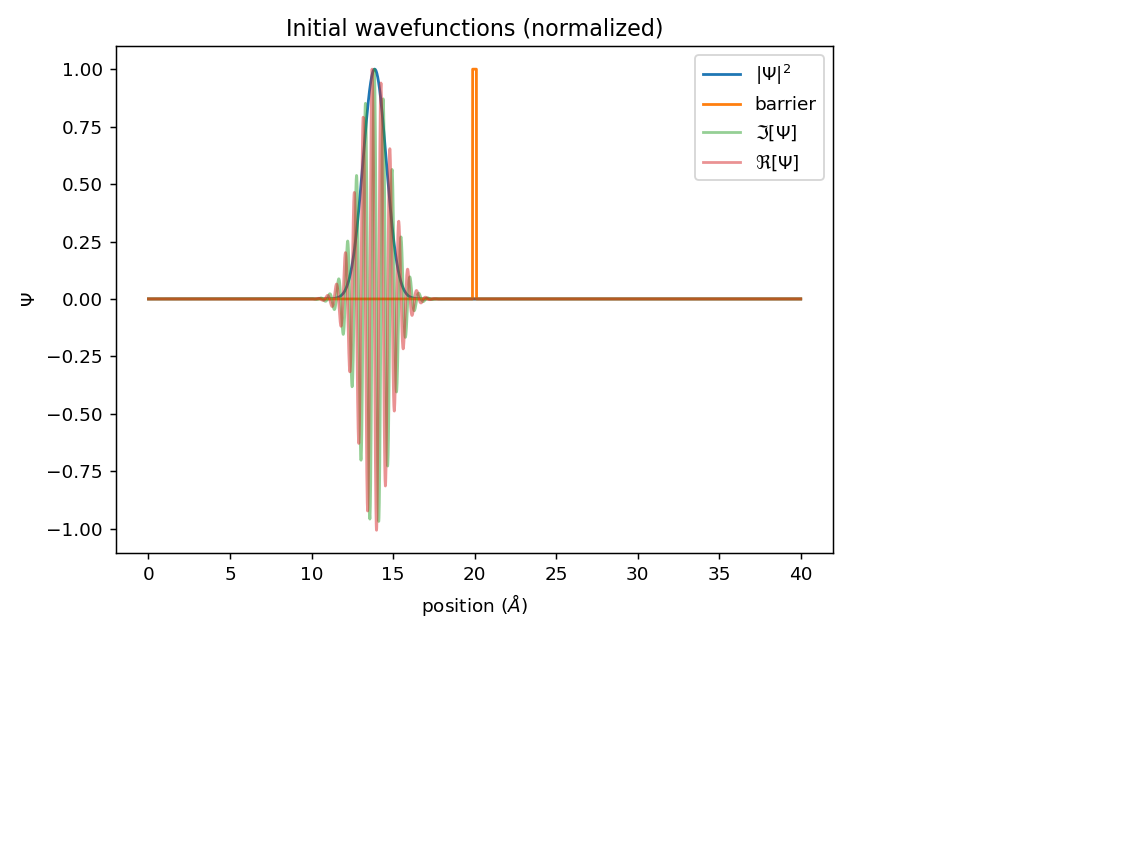

Press enter to start the simulation...


<IPython.core.display.Javascript object>


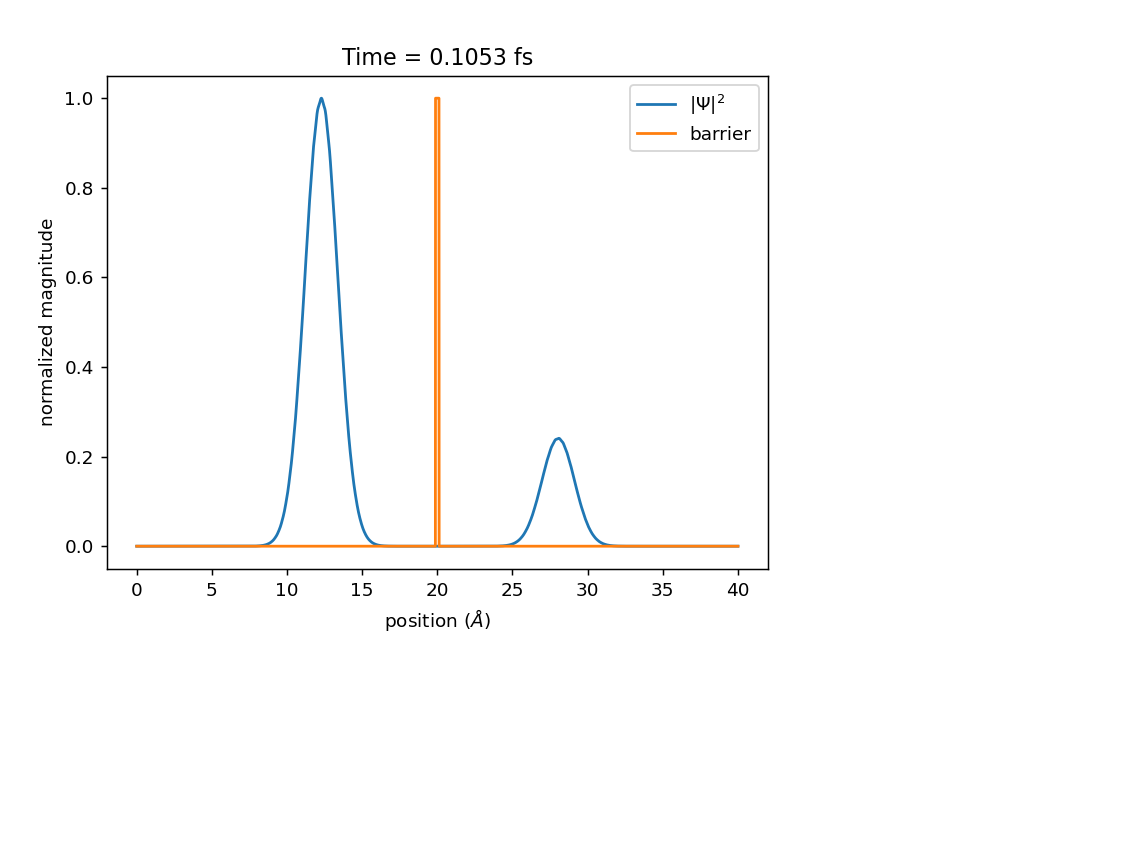

<IPython.core.display.Javascript object>


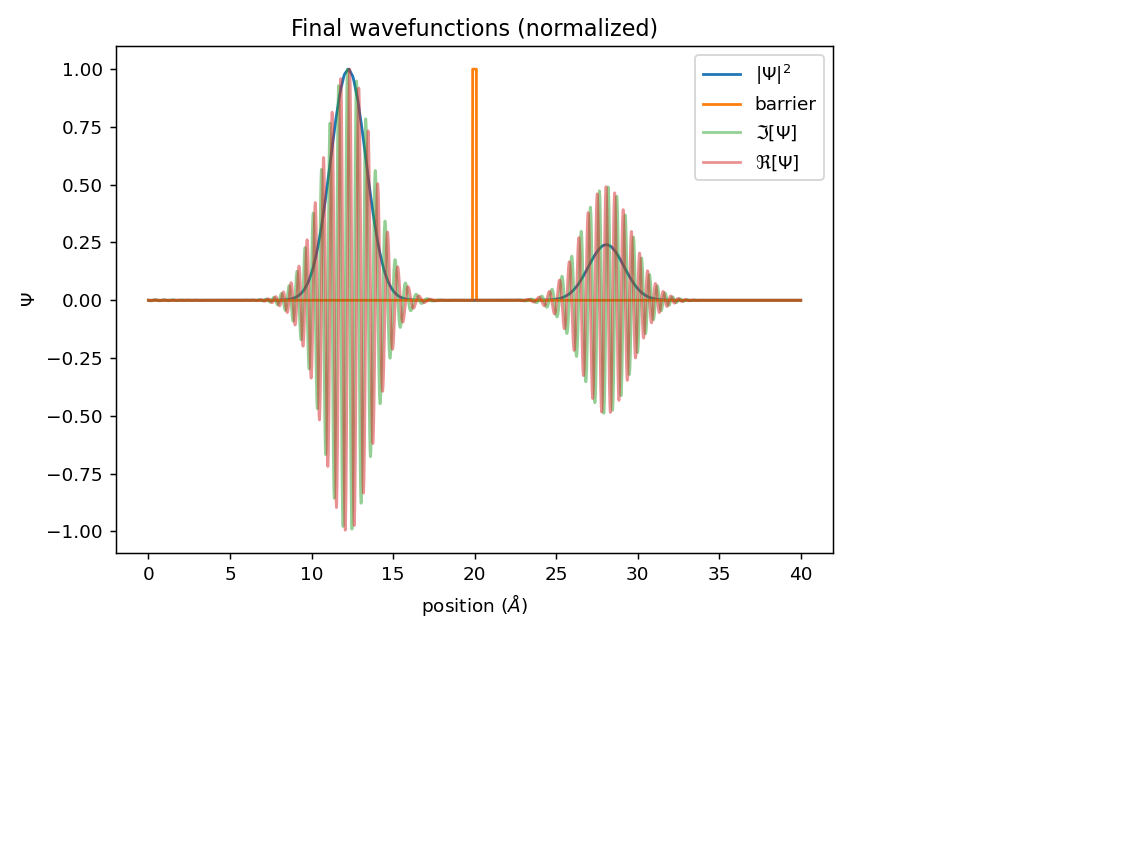

In [61]:
# Jupyter notebook command for plotting
%matplotlib notebook

# Importing Python packages
from QMT_main import run_sim

V0_in = float(input('Enter the barrier height in eV (try 600): '))
bw_in = float(input('Enter the barrier width in Angstrom (try 0.25): '))
ke_in = float(input('Enter the electron energy in eV (try 500): '))
run_sim(V0_in, bw_in, ke_in, 1.0)

# Technological Applications of the Tunneling Phenomenon
## Scanning Tunneling Microscopy (STM)

The scanning tunneling microscope (STM) is microscope for imaging surfaces at the atomic level based on the electronic tunneling.

A needle of platinum–rhodium or tungsten is applied to scan across a conducting surface. When the tip of the needle come close to the surface, the electrons can tunnel between them. The tunneling establish an electronic current between the two conductors, which can be measured and processed by the electronic and computational system. The data processing of this signals can build the microscopic images.

The most particular feature of the STM in comparison with other microscopy techniques is the manipulation and imaging in the small scale of individual atoms. It can be done by its extremely sharp tip, smaller than $0.1 nm$, which is the order of magnitude of the chemical bonds.

As we saw previously, the tunnelling probability is very sensitive to the size of the gap (the potential barrier), and the microscope can detect tiny, atom-scale variations in the height of the surface.

| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Scanning_Tunneling_Microscope_schematic.svg/561px-Scanning_Tunneling_Microscope_schematic.svg.png" width="500"> |
|:--:|
| *Schematic view of an Scanning Tunneling Microscope.[<sup>2</sup>](#fn2)* |

The development of this technique by Gerd Binnig and Heinrich Rohrer was honored with the Nobel Prize in Physics in 1986.

### A Boy and His Atom: The World's Smallest Movie

In 2013, IBM researchers used a Scanning Tunneling Microscope to move thousands of carbon monoxide molecules in a copper plate to make a movie. The same scanning technique was applied to obtain the images magnified 100 million times. A movie made with atoms.

"A Boy and His Atom" holds the Guinness World Records™ record for the World's Smallest Stop-Motion Film.

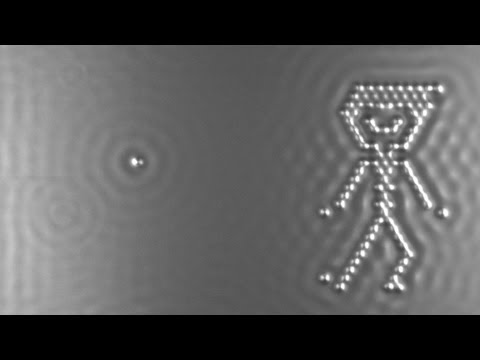

In [57]:
from IPython.display import YouTubeVideo

display_yotube_video("https://www.youtube.com/watch?v=oSCX78-8-q0".split("=")[-1], width=800, height=600)

<span id="fn1"> [1] Adapted from [OpenStax University Physics](https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/07%3A_Quantum_Mechanics/7.07%3A_Quantum_Tunneling_of_Particles_through_Potential_Barriers). Distributed under [Creative Commons Attribution License (by 4.0)](http://creativecommons.org/licenses/by/4.0/).</span>

<span id="fn2"> [2] Obtained from [Wikipedia](https://en.wikipedia.org/wiki/Scanning_tunneling_microscope). Distributed under [Creative Commons Attribution License (by 2.0)](https://creativecommons.org/licenses/by-sa/2.0/at/deed.en).</span>

# Draft Area

The solution of this simple model problem brings a very interesting phenomena related to quantum [world]: the Tunneling.